# Author : Abubakar Siddique M
## Data Science and Business Analytics Internship
# GRIP - The Spark Foundation

### Task 1: Predict the percentage of an student based on the no. of study hours.
### Simple Linear Regression task to predict percentage of Student
### Tools used: Pandas, Numpy, Matplotlib, Scikitlearn, Jupyter Notebook

#### Step-1 : Importing required libraries and data

In [21]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [20]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [22]:
data.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

In [24]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Step-2 Data Visualization

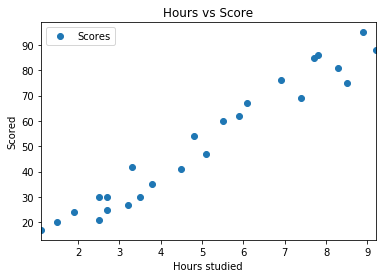

In [25]:
data.plot(x="Hours", y="Scores", style='o')
plt.title("Hours vs Score")
plt.xlabel("Hours studied")
plt.ylabel("Scored")
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000087ED1F5288>,
      dtype=object)

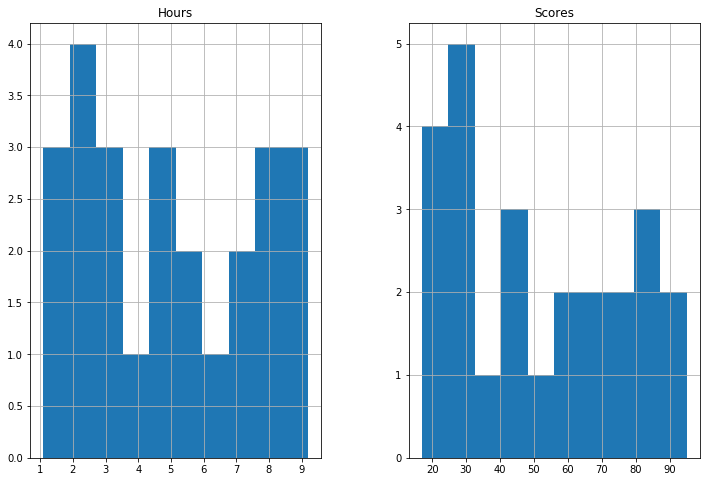

In [26]:
data.hist(figsize=(12, 8))

In [27]:
#correlation
data.Hours.corr(data.Scores)
np.corrcoef(data.Hours, data.Scores)

array([[1.        , 0.97619066],
       [0.97619066, 1.        ]])

#### Step-3: Splitting the data into test and train

In [28]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [29]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


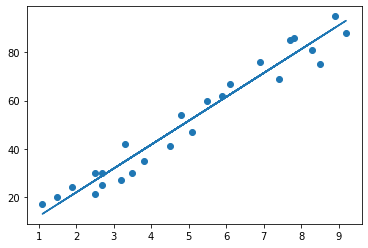

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [11]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### You can also test with your own data

In [52]:

hours = float(input( ))
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

7
No of Hours = 7.0
Predicted Score = 71.39275540593034


In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


# Thank You

###  Model preparation using statsmodel

In [32]:
import statsmodels.formula.api as smf
model=smf.ols("Hours~Scores",data=data).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Hours   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           9.13e-17
Time:                        13:31:24   Log-Likelihood:                -19.914
No. Observations:                  25   AIC:                             43.83
Df Residuals:                      23   BIC:                             46.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0063      0.258     -0.024      0.981      -0.540       0.528
Scores         0.0975      0.005     21.583      0.000       0.088       0.107
==============================================================================
Omnibus:                        4.088   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                1.980
Skew:                           0.388   Prob(JB):                        0.372
Kurtosis:                       1.860   Cond. No.                         132.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
pred=model.predict(data)
print(pred)

0     2.040801
1     4.575288
2     2.625682
3     7.304737
4     2.918123
5     1.943320
6     8.571980
7     5.842532
8     7.889618
9     2.430722
10    8.279539
11    6.037493
12    3.990407
13    4.087887
14    1.650879
15    9.254342
16    2.918123
17    2.333241
18    6.524894
19    6.719855
20    2.918123
21    5.257650
22    3.405525
23    7.402217
24    8.377020
dtype: float64


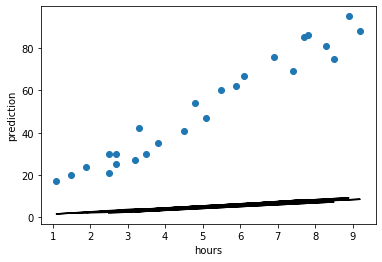

In [42]:
plt.scatter(x=data['Hours'], y=data['Scores'])
plt.plot(data["Hours"], pred, color='black')
plt.xlabel("hours")
plt.ylabel("prediction")
plt.show()

In [45]:
model2 = smf.ols('Hours~np.log(Scores)',data=data).fit()
model2.params
model2.summary()


                        0         1
Intercept      -14.910753 -9.335991
np.log(Scores)   3.772995  5.222262


0     1.569758
1     5.193161
2     2.700077
3     7.295085
4     3.173950
5     1.350318
6     8.014025
7     6.291468
8     7.641227
9     2.353935
10    7.858022
11    6.438945
12    4.578895
13    4.687277
14    0.619369
15    8.358274
16    3.173950
17    2.170333
18    6.787773
19    6.920066
20    3.173950
21    5.817596
22    3.867262
23    7.354657
24    7.910627
dtype: float64

In [46]:
print(model2.conf_int(0.01)) # 99% confidence level
pred2 = model2.predict(pd.DataFrame(data['Scores']))
pred2.corr(data.Hours)
# pred2 = model2.predict(wcat.iloc[:,0])
pred2

                        0         1
Intercept      -14.910753 -9.335991
np.log(Scores)   3.772995  5.222262


0     1.569758
1     5.193161
2     2.700077
3     7.295085
4     3.173950
5     1.350318
6     8.014025
7     6.291468
8     7.641227
9     2.353935
10    7.858022
11    6.438945
12    4.578895
13    4.687277
14    0.619369
15    8.358274
16    3.173950
17    2.170333
18    6.787773
19    6.920066
20    3.173950
21    5.817596
22    3.867262
23    7.354657
24    7.910627
dtype: float64

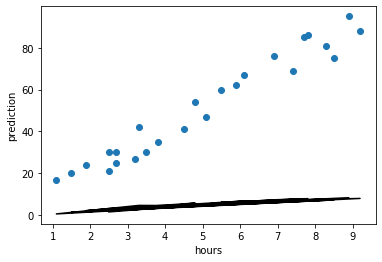

In [47]:
plt.scatter(x=data['Hours'], y=data['Scores'])
plt.plot(data["Hours"], pred2, color='black')
plt.xlabel("hours")
plt.ylabel("prediction")
plt.show()